# Chat Bot Toy Example

This notebook contains R code corresponding to the toy example presented in Section 8.6 of [our paper](https://doi.org/10.1017/S1351324922000535) on our introduction to user studies in natural language processing.

We consider a fictional comparison of three chat bot systems.
The systems are compared with respect to user trust ratings.

## Toy Data
We load our generated toy data.

In [12]:
data <- read.csv("toy_data.csv",
                 header=TRUE,
                 stringsAsFactors=FALSE)

## Overview Plot
We inspect the trust rating distributions for each condition (i.e., chat bot system).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


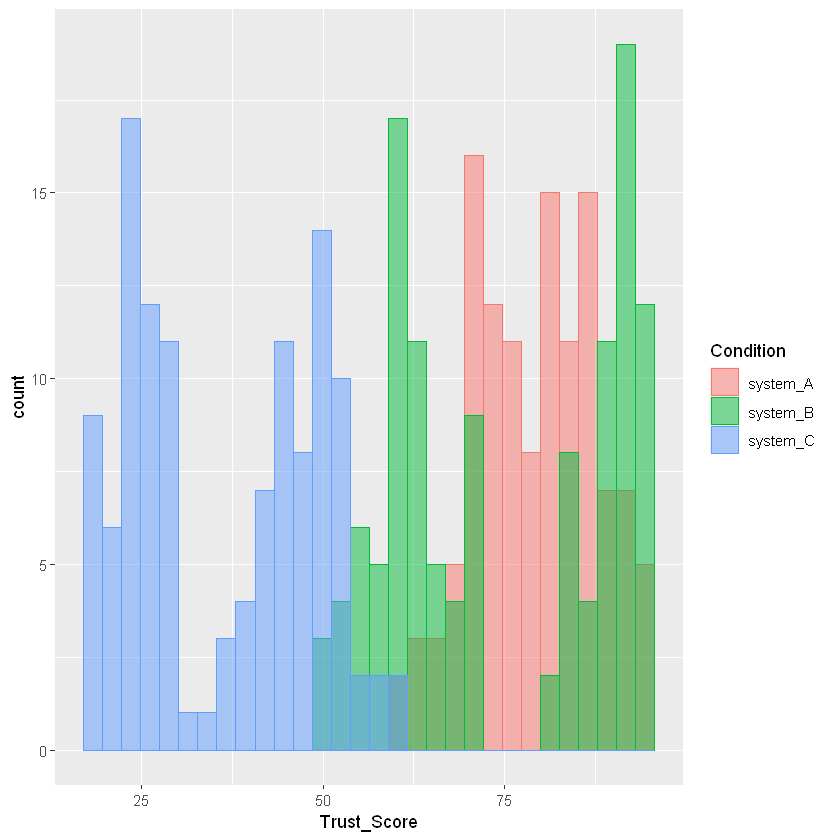

In [11]:
library(ggplot2)
ggplot(data, aes(x=Trust_Score, fill=Condition, color=Condition)) +
  geom_histogram(position="identity", alpha=0.5)

## Q-Q Plot
We plot a quantile-quantile plot and find that a parametric test might not be suitable.

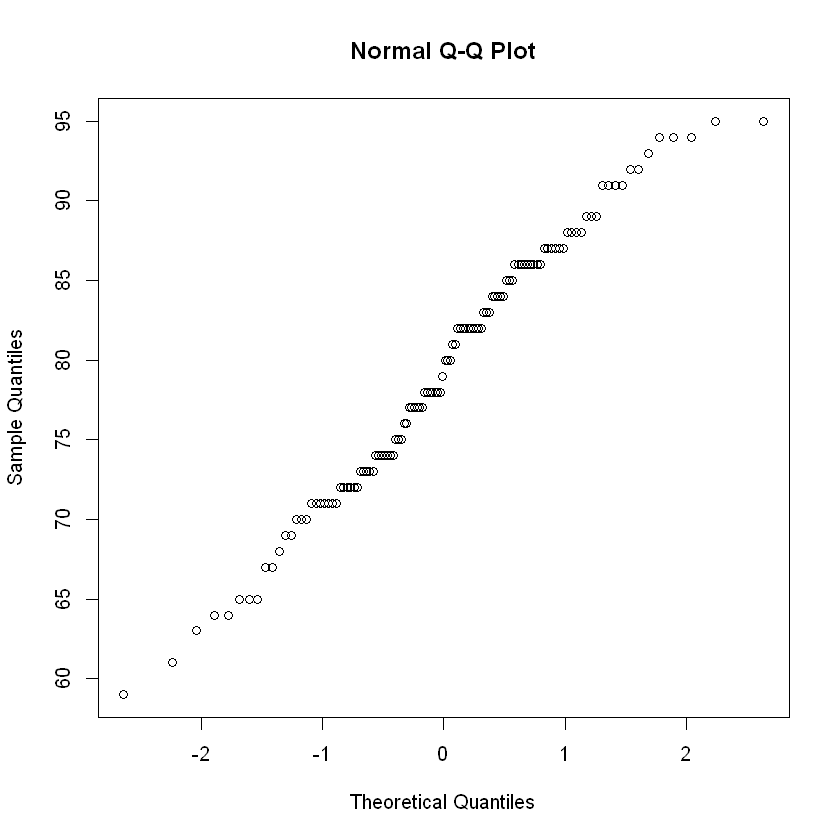

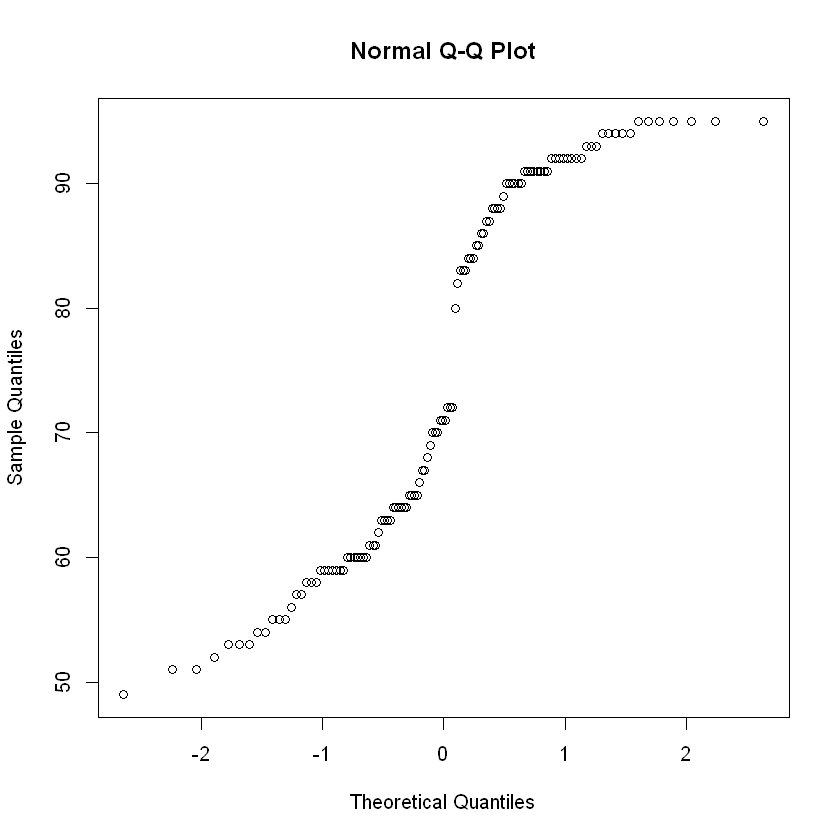

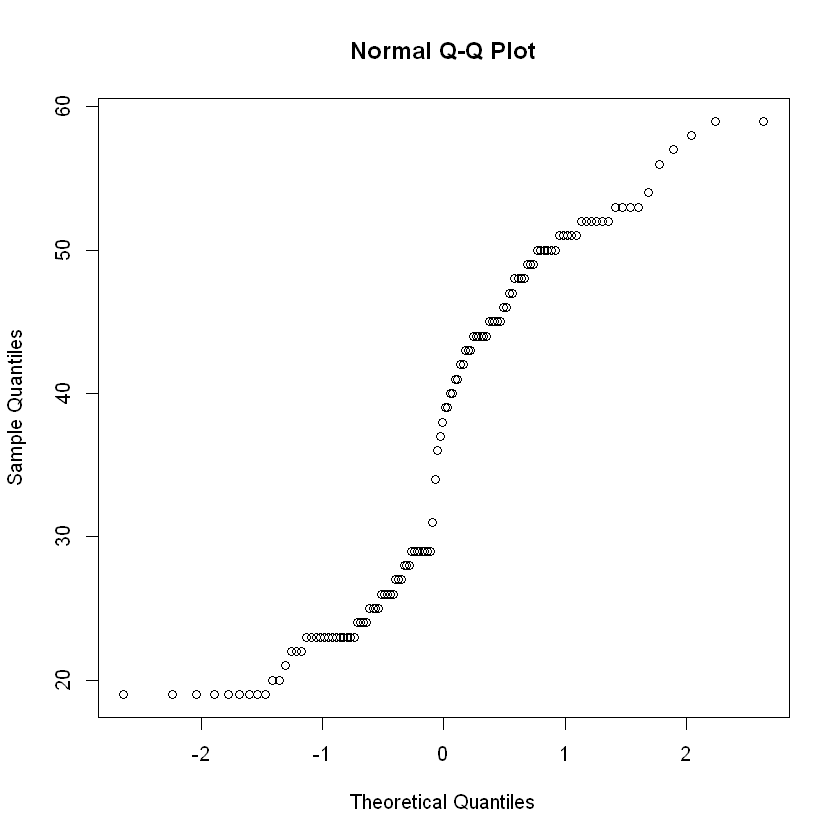

In [6]:
system_AData <- subset(data, Condition=='system_A')
system_BData <- subset(data, Condition=='system_B')
system_CData <- subset(data, Condition=='system_C')
qqnorm(system_AData$Trust_Score)
qqnorm(system_BData$Trust_Score)
qqnorm(system_CData$Trust_Score)

## Friedmann Test
We thus run a non-parametric Friedman test.

In [8]:
friedman.test(Trust_Score ~ Condition | Participant_Id, data = data)


	Friedman rank sum test

data:  Trust_Score and Condition and Participant_Id
Friedman chi-squared = 182.33, df = 2, p-value < 2.2e-16


## Post Hoc Test
As the Friedman test found a significant difference, we run a Nemenyi post hoc test to determine which pairs of chat bots differ significantly.

We find significant differences between system A and C as well as significant differences between system B and C, but no significant difference between system A and B.

In [10]:
library(PMCMRplus)
frdAllPairsNemenyiTest(Trust_Score ~ Condition | Participant_Id, data = data)


	Pairwise comparisons using Nemenyi-Wilcoxon-Wilcox all-pairs test for a two-way balanced complete block design


data: Trust_Score and Condition and Participant_Id



P value adjustment method: single-step



         system_A system_B
system_B 0.19     -       
system_C < 2e-16  2.8e-14 